# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Lab\Residency-5\Internal Lab


# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [3]:
bc_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
print(bc_df.shape)
bc_df.head()

(699, 11)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
bc_df_copy = bc_df.copy()
print(bc_df_copy.shape)
bc_df_copy.head()

(699, 11)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [6]:
bc_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
print(bc_df_copy.shape)
bc_df_copy.info()

(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
bc_df_copy.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
bc_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
bc_df_copy.apply(lambda x : sum(x.isnull()))

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

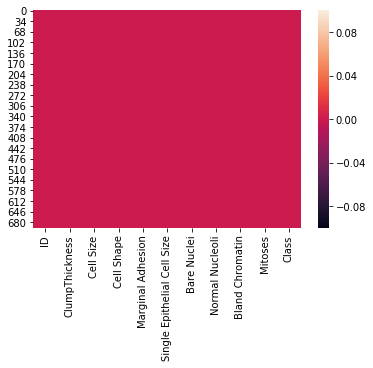

In [11]:
sns.heatmap(bc_df_copy.isna())

### No missing values found. So let us try to remove ? from bare nuclei column
### Get count of rows having ?

In [12]:
bc_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [13]:
bc_df_copy['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
### Here we would like to impute it with suitable values

In [14]:
bc_df_copy['Bare Nuclei'] = bc_df_copy['Bare Nuclei'].replace('?', np.NaN)

In [15]:
bc_df_copy['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [16]:
bc_df_copy = bc_df_copy.fillna(bc_df_copy.median())

In [17]:
bc_df_copy['Bare Nuclei'] = bc_df_copy['Bare Nuclei'].astype(int)

In [18]:
bc_df_copy['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [19]:
bc_df_copy.shape

(699, 11)

In [20]:
bc_df_copy.drop_duplicates(inplace=True)

In [21]:
bc_df_copy.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [22]:
# Check for correlation of variable
bc_df_copy.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


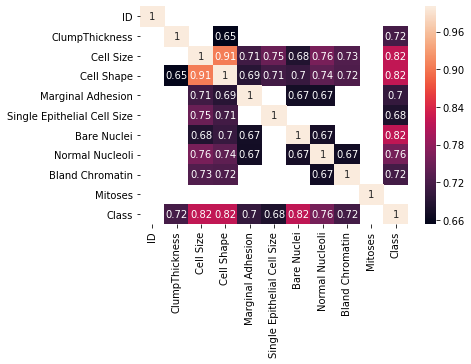

In [23]:
sns.heatmap(bc_df_copy.corr().where(bc_df_copy.corr()>.65),annot=True)

### Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
### Cell shape shows high significance with clump Thickness, cell size, marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
### Target variable shows high correlation with most of these variables

In [24]:
#Let us check for pair plots

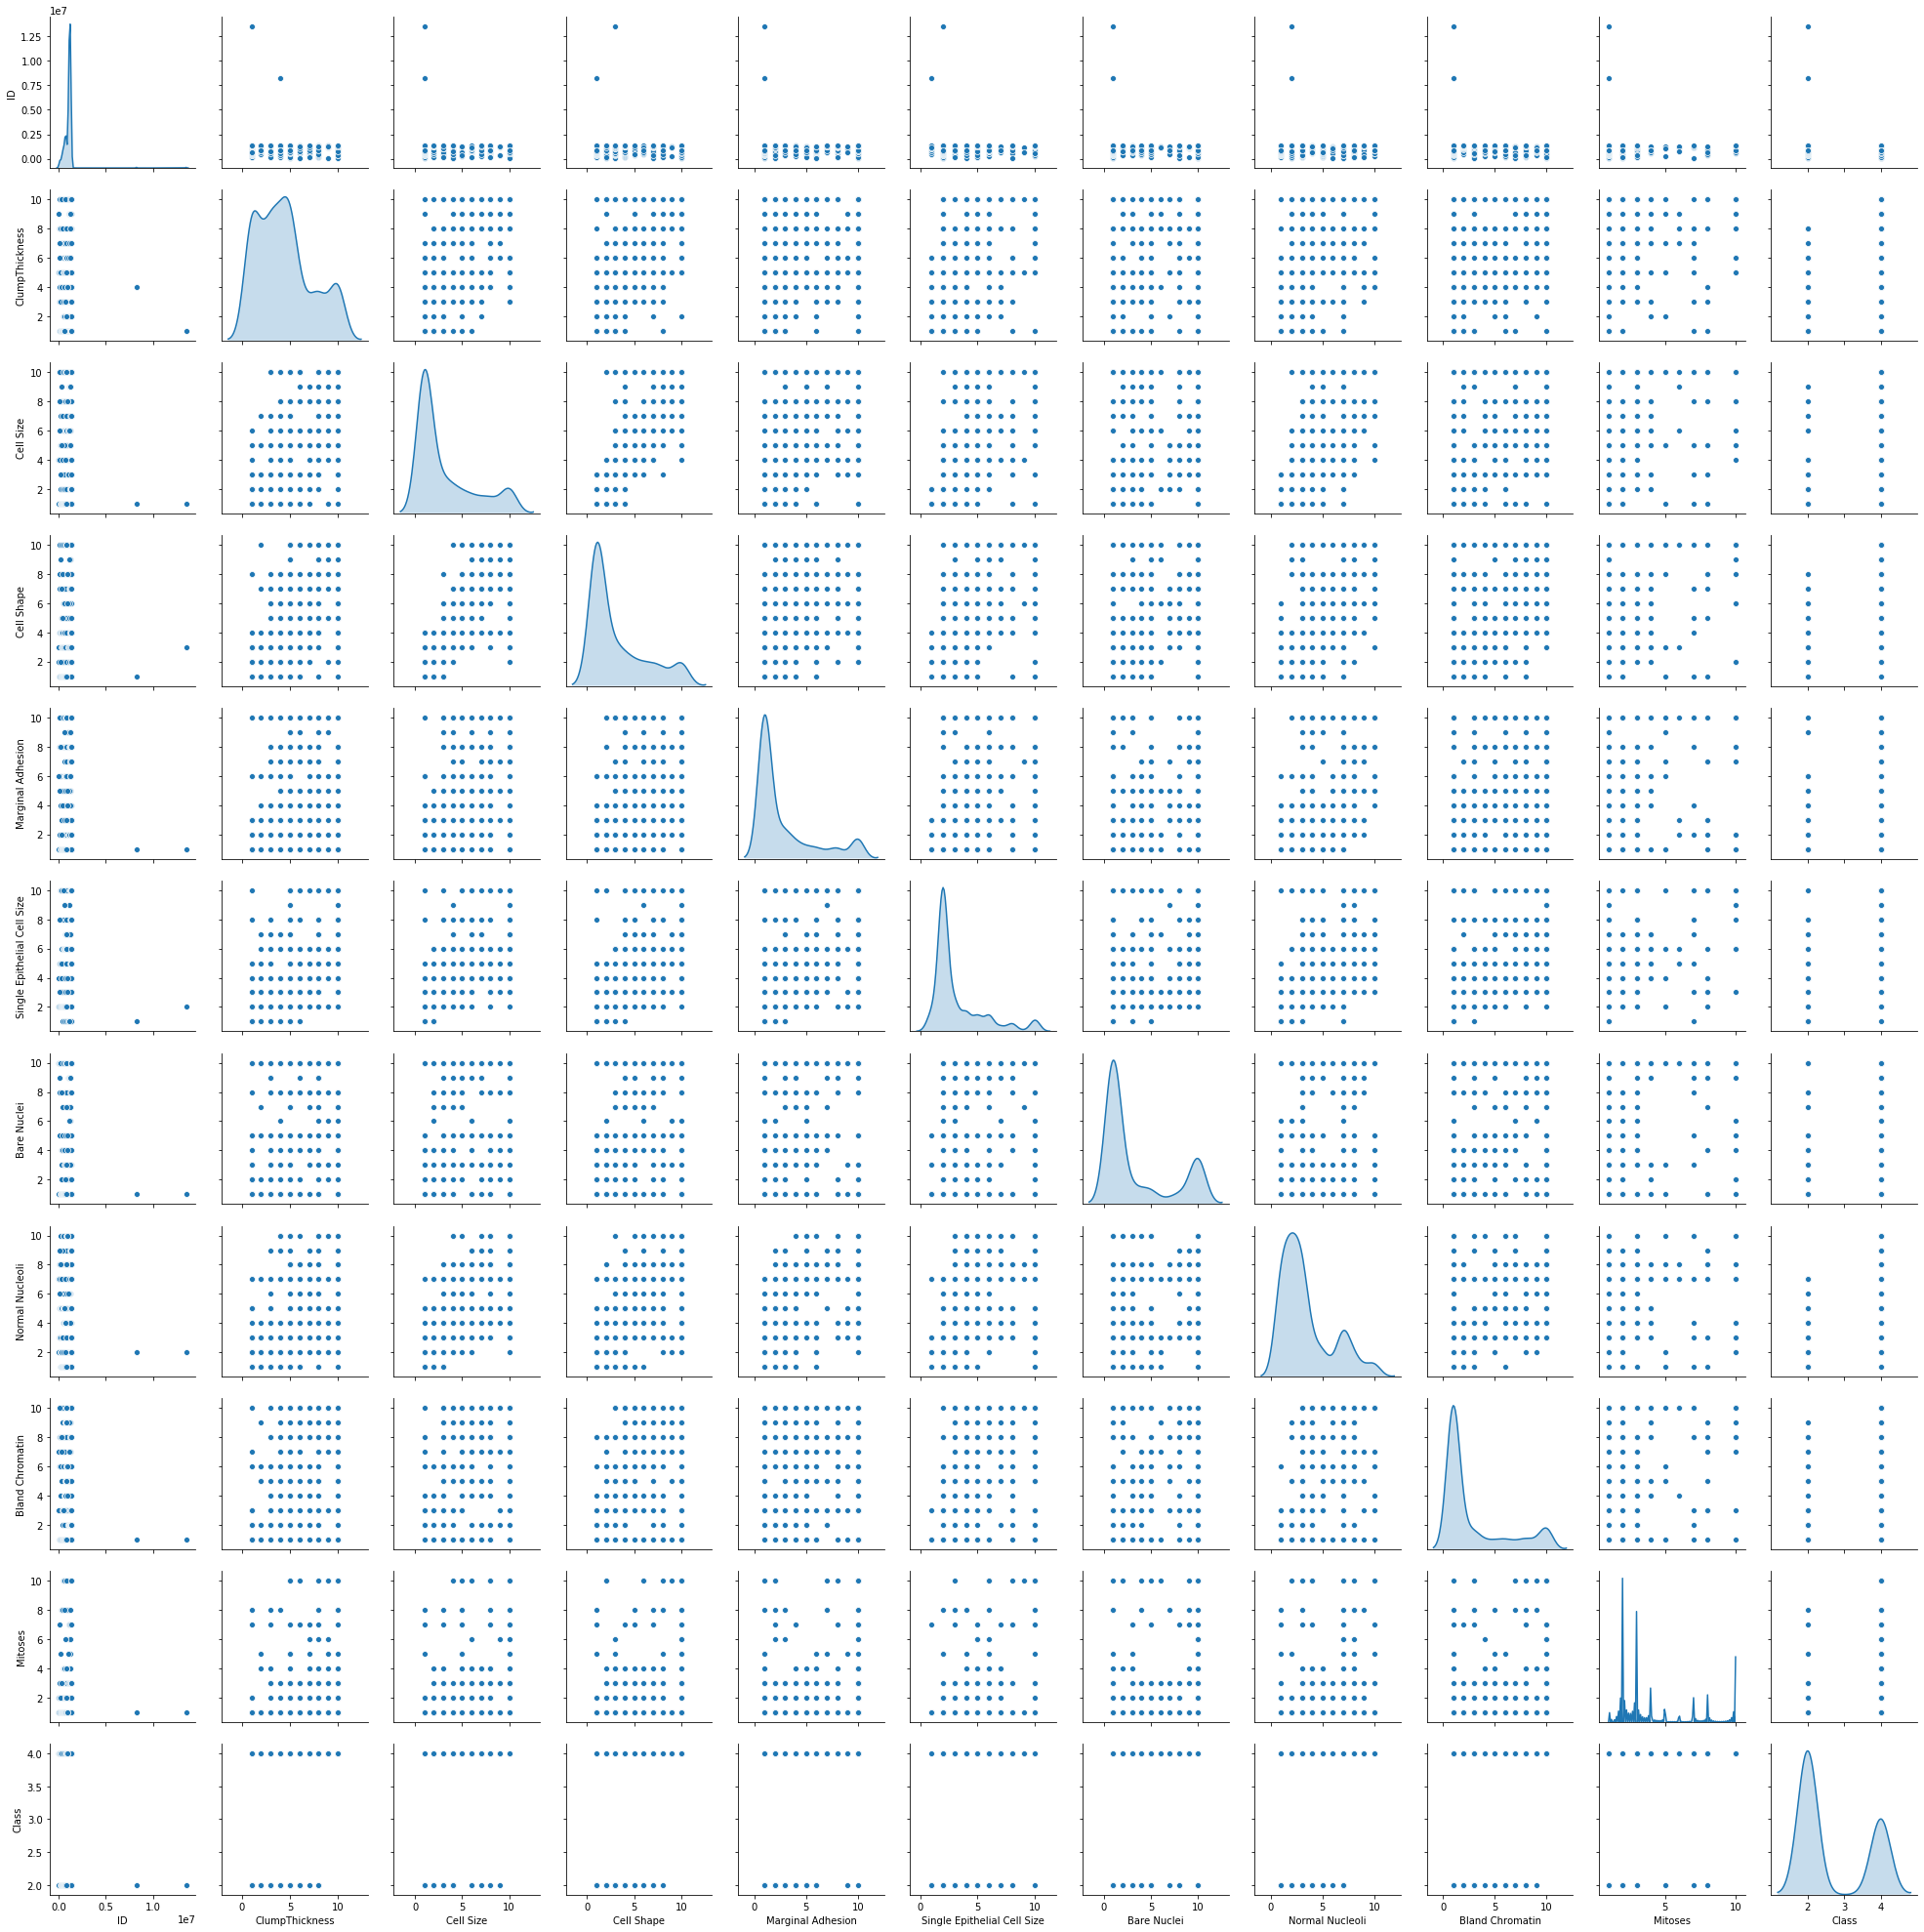

In [25]:
sns.pairplot(bc_df_copy, palette='deep', diag_kind='kde')

### Relationship between variables shows come correlation. 
### Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is Between 1 to 10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016752FF5550>,
      dtype=object)

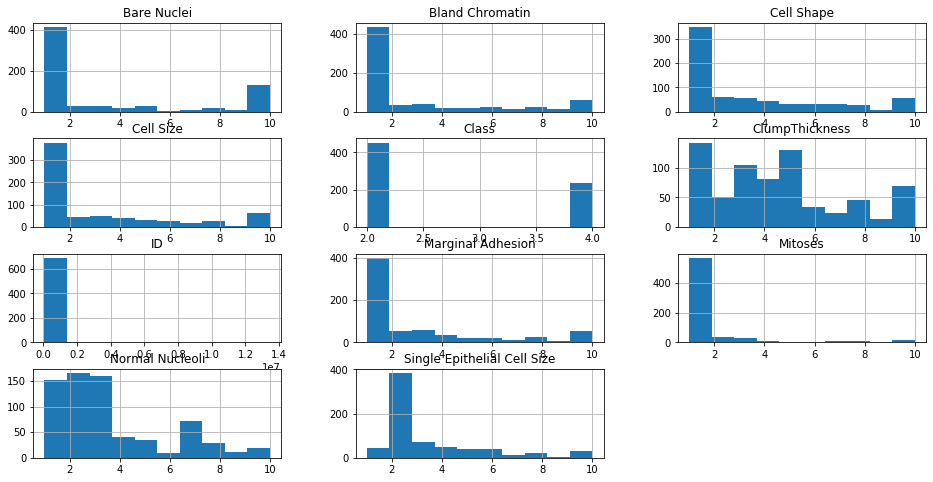

In [26]:
bc_df_copy.hist(figsize=(16,8))

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [27]:
bc_df_copy.groupby(["Class"]).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,452,452,452,452,452,452,452,452,452,452
4,238,238,238,238,238,238,238,238,238,238


In [28]:
# We could see most of the outliers are now removed.

In [29]:
bc_df_features = bc_df_copy.drop(['ID', 'Class'],axis=1)

In [30]:
bc_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
dtypes: int32(1), int64(8)
memory usage: 71.2 KB


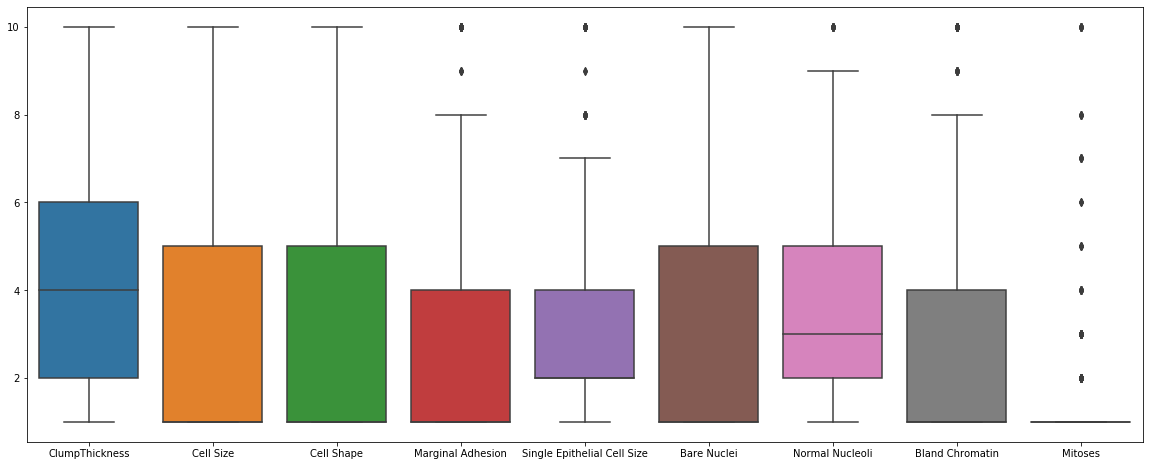

In [31]:
plt.figure(figsize=(20,8))
sns.boxplot(data=bc_df_features)

In [32]:
bc_df_stat=bc_df_features.describe().T
print(bc_df_stat)

                             count      mean       std  min  25%  50%  75%  \
ClumpThickness               690.0  4.428986  2.817378  1.0  2.0  4.0  6.0   
Cell Size                    690.0  3.133333  3.042451  1.0  1.0  1.0  5.0   
Cell Shape                   690.0  3.204348  2.960844  1.0  1.0  1.0  5.0   
Marginal Adhesion            690.0  2.827536  2.867787  1.0  1.0  1.0  4.0   
Single Epithelial Cell Size  690.0  3.213043  2.200964  1.0  2.0  2.0  4.0   
Bare Nuclei                  690.0  3.482609  3.617064  1.0  1.0  1.0  5.0   
Normal Nucleoli              690.0  3.436232  2.444060  1.0  2.0  3.0  5.0   
Bland Chromatin              690.0  2.885507  3.067682  1.0  1.0  1.0  4.0   
Mitoses                      690.0  1.594203  1.724230  1.0  1.0  1.0  1.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Bar

In [33]:
iqr=(bc_df_stat['75%']-bc_df_stat['25%'])
print(iqr)

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
dtype: float64


In [34]:
upper_whisker = bc_df_stat['75%'] + 1.5*iqr
print(upper_whisker)

ClumpThickness                 12.0
Cell Size                      11.0
Cell Shape                     11.0
Marginal Adhesion               8.5
Single Epithelial Cell Size     7.0
Bare Nuclei                    11.0
Normal Nucleoli                 9.5
Bland Chromatin                 8.5
Mitoses                         1.0
dtype: float64


In [35]:
lower_whisker = bc_df_stat['25%'] - 1.5*iqr
print(lower_whisker)

ClumpThickness                -4.0
Cell Size                     -5.0
Cell Shape                    -5.0
Marginal Adhesion             -3.5
Single Epithelial Cell Size   -1.0
Bare Nuclei                   -5.0
Normal Nucleoli               -2.5
Bland Chromatin               -3.5
Mitoses                        1.0
dtype: float64


In [36]:
bc_df_features.shape

(690, 9)

In [37]:
bc_df_features1=np.where(bc_df_features>upper_whisker,bc_df_stat['75%'],bc_df_features)

In [38]:
bc_df_features1.shape

(690, 9)

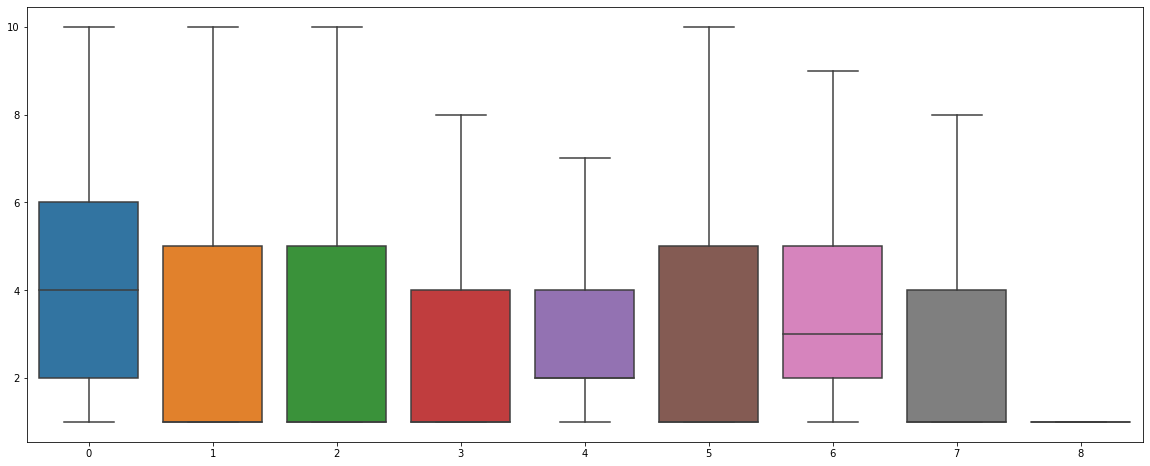

In [39]:
plt.figure(figsize=(20,8))
sns.boxplot(data=bc_df_features1)

# Q6 Create a covariance matrix for identifying Principal components

In [40]:
# PCA
# Step 1 - Create covariance matrix

In [41]:
bc_df_features1.shape

(690, 9)

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
bc_df_scaled = sc.fit_transform(bc_df_features1)

In [43]:
cov_matrix=np.cov(bc_df_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.49279485 0.53403385 0.59150555
  0.56551502 0.51578744 0.        ]
 [0.64410677 1.00145138 0.9066632  0.69312971 0.73745171 0.68556472
  0.72276807 0.65740596 0.        ]
 [0.65453792 0.9066632  1.00145138 0.66107626 0.71431099 0.70518656
  0.70397842 0.63949795 0.        ]
 [0.49279485 0.69312971 0.66107626 1.00145138 0.64404683 0.64939578
  0.66034173 0.58293653 0.        ]
 [0.53403385 0.73745171 0.71431099 0.64404683 1.00145138 0.62229193
  0.6285222  0.62013468 0.        ]
 [0.59150555 0.68556472 0.70518656 0.64939578 0.62229193 1.00145138
  0.6835083  0.58982763 0.        ]
 [0.56551502 0.72276807 0.70397842 0.66034173 0.6285222  0.6835083
  1.00145138 0.61888241 0.        ]
 [0.51578744 0.65740596 0.63949795 0.58293653 0.62013468 0.58982763
  0.61888241 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [44]:
# Step 2- Get eigen values and eigen vector

In [45]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31604737 -0.00888914  0.82634557  0.05980487  0.13499436 -0.16552224
  -0.37847444 -0.15731316  0.        ]
 [ 0.38785154 -0.72526838  0.05245436  0.02474312 -0.37748723  0.27730818
   0.27169767 -0.16424745  0.        ]
 [ 0.38390378  0.67952999  0.12851783  0.00164897 -0.36316144  0.36489995
   0.32389918 -0.06624536  0.        ]
 [ 0.34312829  0.05563614 -0.4189233  -0.39913778  0.06302594  0.18287441
  -0.57609519 -0.41840042  0.        ]
 [ 0.35123057  0.03641762 -0.22325389  0.1906435  -0.50305919 -0.53545051
  -0.28155004  0.41240438  0.        ]
 [ 0.35237471 -0.07763428  0.03271821 -0.3809319   0.38727059  0.24254447
   0.04164535  0.71629932  0.        ]
 [ 0.35644858  0.0382504  -0.11097217 -0.23057295  0.32121124 -0.59526257
   0.51377447 -0.29073048  0.        ]
 [ 0.33163182  0.01529543 -0.24322906  0.77580895  0.44406948  0.17098227
  -0.03423686 -0.03378876  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [46]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.32428003  76.13546029  81.65833711  86.88443726  91.13052493
  95.16020915  98.86337652 100.         100.        ]


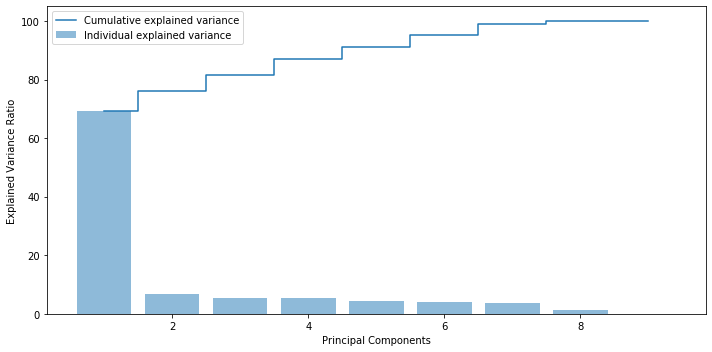

In [47]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [48]:
y=bc_df_copy.pop('Class')

In [49]:
y.shape

(690,)

In [65]:
pca = PCA(n_components=6,random_state=1)
pca.fit(bc_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
bc_df_pca = pca.transform(bc_df_scaled)

In [67]:
bc_df_pca.shape

(690, 6)

In [68]:
pca.components_

array([[ 0.31604737,  0.38785154,  0.38390378,  0.34312829,  0.35123057,
         0.35237471,  0.35644858,  0.33163182, -0.        ],
       [ 0.82634557,  0.05245436,  0.12851783, -0.4189233 , -0.22325389,
         0.03271821, -0.11097217, -0.24322906, -0.        ],
       [ 0.05980487,  0.02474312,  0.00164897, -0.39913778,  0.1906435 ,
        -0.3809319 , -0.23057295,  0.77580895,  0.        ],
       [-0.13499436,  0.37748723,  0.36316144, -0.06302594,  0.50305919,
        -0.38727059, -0.32121124, -0.44406948,  0.        ],
       [ 0.37847444, -0.27169767, -0.32389918,  0.57609519,  0.28155004,
        -0.04164535, -0.51377447,  0.03423686,  0.        ],
       [-0.15731316, -0.16424745, -0.06624536, -0.41840042,  0.41240438,
         0.71629932, -0.29073048, -0.03378876,  0.        ]])

In [69]:
pca.components_.shape

(6, 9)

In [70]:
pca.explained_variance_

array([5.55399167, 0.54568527, 0.44247141, 0.41869482, 0.34018003,
       0.32284263])

In [71]:
pca.explained_variance_ratio_

array([0.6932428 , 0.0681118 , 0.05522877, 0.052261  , 0.04246088,
       0.04029684])

# Q10 Find correlation between components and features

In [73]:
df_comp=pd.DataFrame(pca.components_,columns=list(bc_df_scaled))

In [81]:
df_comp.head()

,0.202823,-0.701698,-0.745040,-0.683505,-0.585945,-0.686858,-0.133437,-0.637665,0.000000
,0.202823,0.285065,0.268920,1.398696,2.979328,1.803153,-0.133437,-0.123058,0.000000
,-0.507572,-0.701698,-0.745040,-0.683505,-0.585945,-0.410190,-0.133437,-0.637665,0.000000
,0.558020,1.600748,1.620866,-0.683505,0.127110,0.143146,-0.133437,2.449975,0.000000
,-0.152375,-0.701698,-0.745040,0.357595,-0.585945,-0.686858,-0.133437,-0.637665,0.000000
,1.268415,2.258590,2.296839,2.960347,2.979328,1.803153,2.614965,2.449975,0.000000
,-1.217967,-0.701698,-0.745040,-0.683505,-0.585945,1.803153,-0.133437,-0.637665,0.000000
,-0.862769,-0.701698,-0.407053,-0.683505,-0.585945,-0.686858,-0.133437,-0.637665,0.000000
,-0.862769,-0.701698,-0.745040,-0.683505,-0.585945,-0.686858,-1.049571,-0.637665,0.000000
,-0.152375,-0.372777,-0.745040,-0.683505,-0.585945,-0.686858,-0.591504,-0.637665,0.000000
,-1.217967,-0.701698,-0.745040,-0.683505,-1.298999,-0.686858,-0.133437,-0.637665,0.000000


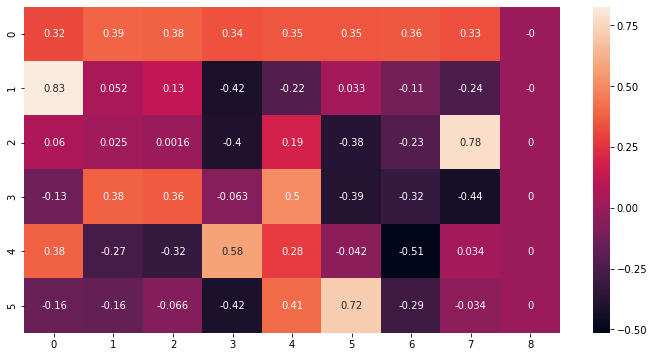

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(pca.components_),annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [82]:
jokes_df = pd.read_csv('jokes.csv')
print(jokes_df.shape)
jokes_df.head()

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [113]:
ratings_df = jokes_df.drop('NumJokes',axis=1)

In [114]:
ratings_df.shape

(24983, 100)

In [115]:
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [119]:
ratings_df=ratings_df[:200]

In [120]:
ratings_df.shape

(200, 100)

In [121]:
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [123]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 100 columns):
Joke1      200 non-null float64
Joke2      200 non-null float64
Joke3      200 non-null float64
Joke4      200 non-null float64
Joke5      200 non-null float64
Joke6      200 non-null float64
Joke7      200 non-null float64
Joke8      200 non-null float64
Joke9      200 non-null float64
Joke10     200 non-null float64
Joke11     200 non-null float64
Joke12     200 non-null float64
Joke13     200 non-null float64
Joke14     200 non-null float64
Joke15     200 non-null float64
Joke16     200 non-null float64
Joke17     200 non-null float64
Joke18     200 non-null float64
Joke19     200 non-null float64
Joke20     200 non-null float64
Joke21     200 non-null float64
Joke22     200 non-null float64
Joke23     200 non-null float64
Joke24     200 non-null float64
Joke25     200 non-null float64
Joke26     200 non-null float64
Joke27     200 non-null float64
Joke28     200 non-null float6

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [124]:
ratings_df = ratings_df.replace(99.00, np.NaN)

In [125]:
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [126]:
ratings_df = ratings_df.fillna(0)

In [127]:
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [128]:
ratings_diff = ratings_df.mean()

In [129]:
ratings_diff.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [131]:
print('Top 10 jokes:\n',ratings_diff.nlargest(10))

Top 10 jokes:
 Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64
